In [35]:
import pandas as pd # Manipulación y análisis de datos tabulares (filas y columnas).
import numpy as np # Operaciones numéricas y matriciales.
import seaborn as sns # Visualización estadística de datos.
import matplotlib.pyplot as plt # Creación de gráficos y visualizaciones.

In [36]:
from sklearn.decomposition import PCA # Implementación del Análisis de Componentes Principales (PCA).
from sklearn.preprocessing import StandardScaler # Estandarización de datos para análisis estadísticos.

In [37]:
# Cargo las funciones que voy a utilizar
from FuncionesMineria2 import (plot_varianza_explicada, plot_cos2_heatmap, plot_corr_cos, plot_cos2_bars,
                               plot_contribuciones_proporcionales, plot_pca_scatter, plot_pca_scatter_with_vectors,
                               plot_pca_scatter_with_categories)

In [53]:
# Carga el archivo Excel 'notas.xlsx' en un DataFrame llamado notas.
notas = pd.read_excel('notas.xlsx')

# Establece la columna 'Alumno' como índice del DataFrame notas y eliminarla.
notas = notas.set_index('Alumno', drop=True)

# Quita 'EXTRA_ESC' y crea versión con sólo 2 decimales del data frame
notas = notas.drop('EXTRA_ESC', axis=1)
notas_2 = notas.round(decimals = 2)
notas_2[112]

KeyError: 112

In [39]:
# Genera una lista con los nombres de las variables.
variables = list(notas)
variables

['Matematicas',
 'Fisica',
 'Lengua',
 'Ingles',
 'Historia',
 'Literatura',
 'Economia']

## Cálculo de los estadísticos descriptivos.

In [40]:
   # Calcula los estadísticas descriptivas para cada variable y crea un DataFrame con los resultados.
estadisticos = pd.DataFrame({
    'Mínimo': notas[variables].min(),
    'Q1': notas[variables].quantile(0.25),
    'Mediana': notas[variables].median(),
    'Q3': notas[variables].quantile(0.75),
    'Media': notas[variables].mean(),
    'Máximo': notas[variables].max(),
    'Desv. típica': notas[variables].std(),
    'Varianza': notas[variables].var(),
    'Coef. de Variación': (notas[variables].std() / notas[variables].mean()),
    'Missing': notas[variables].isna().sum()  # Cuenta los valores NaN por variable.
})

In [41]:
estadisticos_2 = estadisticos.round(decimals = 2)
display(estadisticos_2)

,Mínimo,Q1,Mediana,Q3,Media,Máximo,Desv. típica,Varianza,Coef. de Variación,Missing
Matematicas,1.66,4.33,5.27,6.24,5.30,8.86,1.47,2.16,0.28,0
Fisica,0.21,3.55,4.51,5.64,4.63,8.37,1.52,2.30,0.33,0
Lengua,2.97,5.14,6.05,6.63,5.97,8.57,1.27,1.63,0.21,0
Ingles,3.27,5.77,6.75,8.04,6.81,10.62,1.47,2.17,0.22,0
Historia,2.33,5.55,6.27,7.13,6.35,9.41,1.37,1.89,0.22,0
Literatura,2.40,5.61,6.59,7.55,6.61,10.46,1.46,2.12,0.22,0
Economia,1.64,4.05,5.08,6.14,5.12,8.78,1.51,2.27,0.29,0


             Matematicas    Fisica    Lengua    Ingles  Historia  Literatura  \
Matematicas     1.000000  0.727579 -0.070642  0.480579  0.126563    0.089879   
Fisica          0.727579  1.000000 -0.069020  0.391634  0.162506    0.068232   
Lengua         -0.070642 -0.069020  1.000000  0.472296  0.715354    0.643183   
Ingles          0.480579  0.391634  0.472296  1.000000  0.462266    0.340405   
Historia        0.126563  0.162506  0.715354  0.462266  1.000000    0.730309   
Literatura      0.089879  0.068232  0.643183  0.340405  0.730309    1.000000   
Economia        0.566023  0.334095 -0.398970  0.033019 -0.438939   -0.275412   

             Economia  
Matematicas  0.566023  
Fisica       0.334095  
Lengua      -0.398970  
Ingles       0.033019  
Historia    -0.438939  
Literatura  -0.275412  
Economia     1.000000  


<Axes: >

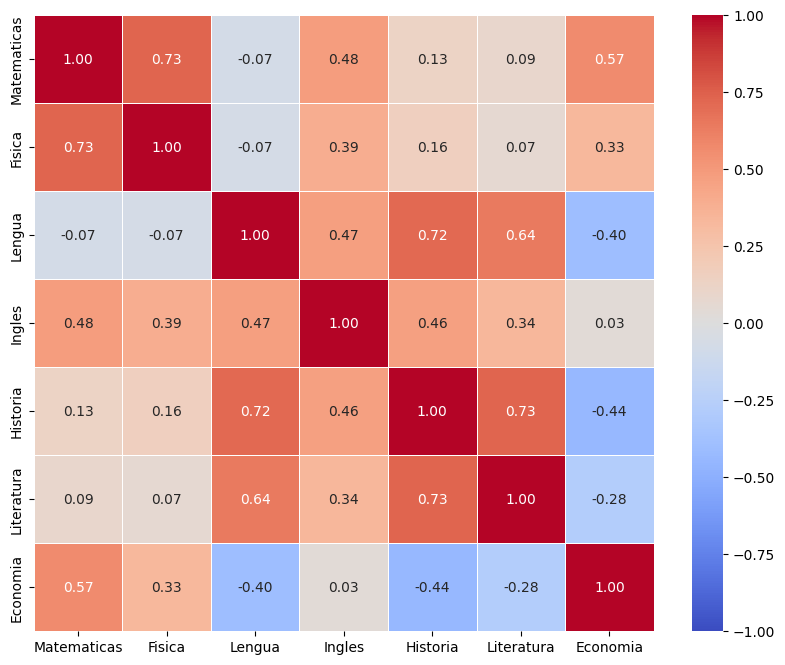

In [42]:
# Cálculo y representación de la matriz de correlación entre las
# variables del DataFrame 'notas'.
R = notas.corr()
print(R)

# Crea una nueva figura de tamaño 10x8 pulgadas para el gráfico.
plt.figure(figsize=(10, 8))

# Genera un mapa de calor (heatmap) de la matriz de correlaciones 'R' utilizando Seaborn.
# 'annot=True' agrega los valores de correlación en las celdas.
# 'cmap' establece el esquema de colores (en este caso, 'coolwarm' para colores fríos y cálidos).
# 'fmt' controla el formato de los números en las celdas ('.2f' para dos decimales).
# 'linewidths' establece el ancho de las líneas que separan las celdas.
sns.heatmap(R, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

## Analisis PCA:

In [43]:
# Estandarizamos los datos:
# Utilizamos StandardScaler() para estandarizar (normalizar) las variables.
# - StandardScaler calcula la media y la desviación estándar de las variables en 'notas' durante el ajuste.
# - Luego, utiliza estos valores para transformar 'notas' de manera que tengan media 0 y desviación estándar 1.
# - El método fit_transform() realiza ambas etapas de ajuste y transformación en una sola llamada.
# Finalmente, convertimos la salida en un DataFrame usando pd.DataFrame().
notas_std = pd.DataFrame(
    StandardScaler().fit_transform(notas),  # Datos estandarizados
    columns=['{}_z'.format(variable) for variable in variables],  # Nombres de columnas estandarizadas
    index=notas.index  # Índices (etiquetas de filas) del DataFrame
)
notas_std.head()

,Matematicas_z,Fisica_z,Lengua_z,Ingles_z,Historia_z,Literatura_z,Economia_z
Alumno,,,,,,,
1,1.984788,1.288100,0.412892,0.416800,2.130991,0.979363,0.454951
2,0.046385,-0.462778,0.053811,-0.501058,-0.119002,0.483532,-0.531895
3,-0.627619,-1.086494,0.357885,-0.381331,-0.699891,0.087464,0.743655
4,1.595663,0.782447,1.611981,0.862701,0.675615,1.663703,0.809081
5,0.057113,0.747611,-0.598737,-0.764955,-0.665394,-0.578819,0.901758


In [44]:
# Crea una instancia de Análisis de Componentes Principales (ACP):
# - Utilizamos PCA(n_components=7) para crear un objeto PCA que realizará un análisis de componentes principales.
# - Establecemos n_components en 7 para retener el maximo de las componentes principales (maximo= numero de variables).
pca = PCA(n_components=7)

# Aplicar el Análisis de Componentes Principales (ACP) a los datos estandarizados:
# - Usamos pca.fit(notas_std) para ajustar el modelo de ACP a los datos estandarizados.
fit = pca.fit(notas_std)

# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_
autovalores

# Obtener la varianza explicada por cada componente principal como un porcentaje de la varianza total.
var_explicada = fit.explained_variance_ratio_
# Por ejemplo podemos ver que la varianza explicada por tres CP es:
var_explicada_2 = np.sum(var_explicada[:2])
var_explicada_2

# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada = np.cumsum(var_explicada)
var_acumulada

# Crear un DataFrame de pandas con los datos anteriores y establecer índice.
data = {'Autovalores': autovalores, 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada': var_acumulada}
tabla = pd.DataFrame(data, index=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)])

# Imprimir la tabla
print(tabla)

              Autovalores  Variabilidad Explicada  Variabilidad Acumulada
Componente 1     2.941159                0.416664                0.416664
Componente 2     2.347950                0.332626                0.749290
Componente 3     0.574517                0.081390                0.830680
Componente 4     0.561622                0.079563                0.910243
Componente 5     0.265562                0.037621                0.947865
Componente 6     0.220849                0.031287                0.979152
Componente 7     0.147164                0.020848                1.000000


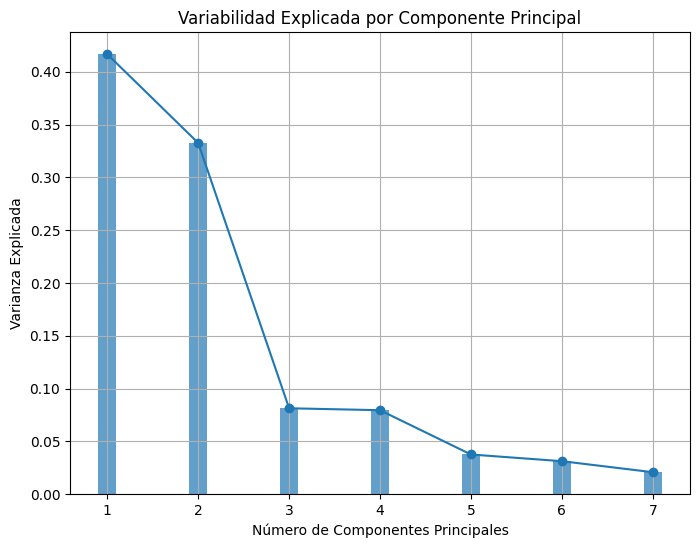

In [45]:
# Representacion de la variabilidad explicada:

plot_varianza_explicada(var_explicada, fit.n_components_)

In [46]:
# Crea una instancia de ACP con las dos primeras componentes que nos interesan y aplicar a los datos.
pca = PCA(n_components=7)
fit = pca.fit(notas_std)

# Obtener los autovectores asociados a cada componente principal.
print(pca.components_)

# Obtener los autovectores asociados a cada componente principal y transponerlos.
autovectores = pd.DataFrame(pca.components_.T,
                            columns = ['Autovector {}'.format(i) for i in range(1, fit.n_components_+1)],
                            index = ['{}_z'.format(variable) for variable in variables])

display(autovectores)



[[ 0.11746604  0.12830522  0.49645673  0.388664    0.5345533   0.48263264
  -0.23136337]
 [ 0.60263568  0.53537951 -0.16204474  0.29354499 -0.05686958 -0.06570724
   0.47981274]
 [-0.05890583 -0.52936523  0.34640713  0.59362923 -0.26186017 -0.21785824
   0.3575976 ]
 [ 0.09218016 -0.29825621  0.07708934 -0.4337986   0.01087691  0.59849513
   0.59169869]
 [-0.13477919  0.34627561  0.71668809 -0.3895939   0.00741382 -0.38989612
   0.21078094]
 [ 0.46994114 -0.42974643 -0.05907738 -0.20106832  0.59840667 -0.43869582
   0.00318708]
 [ 0.60996294 -0.15209683  0.29017167 -0.17315565 -0.53308916  0.11232391
  -0.44025967]]


,Autovector 1,Autovector 2,Autovector 3,Autovector 4,Autovector 5,Autovector 6,Autovector 7
Matematicas_z,0.117466,0.602636,-0.058906,0.092180,-0.134779,0.469941,0.609963
Fisica_z,0.128305,0.535380,-0.529365,-0.298256,0.346276,-0.429746,-0.152097
Lengua_z,0.496457,-0.162045,0.346407,0.077089,0.716688,-0.059077,0.290172
Ingles_z,0.388664,0.293545,0.593629,-0.433799,-0.389594,-0.201068,-0.173156
Historia_z,0.534553,-0.056870,-0.261860,0.010877,0.007414,0.598407,-0.533089
Literatura_z,0.482633,-0.065707,-0.217858,0.598495,-0.389896,-0.438696,0.112324
Economia_z,-0.231363,0.479813,0.357598,0.591699,0.210781,0.003187,-0.440260


In [47]:
# Calculamos las dos primeras componentes principales
resultados_pca = pd.DataFrame(fit.transform(notas_std),
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=notas_std.index)

# Añadimos las componentes principales a la base de datos estandarizada.
notas_z_cp = pd.concat([notas_std, resultados_pca], axis=1)
display(notas_z_cp)

,Matematicas_z,Fisica_z,Lengua_z,Ingles_z,Historia_z,Literatura_z,Economia_z,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
Alumno,,,,,,,,,,,,,,
1,1.984788,1.288100,0.412892,0.416800,2.130991,0.979363,0.454951,2.271935,1.973920,-1.017032,0.528313,0.041906,1.117986,-0.163929
2,0.046385,-0.462778,0.053811,-0.501058,-0.119002,0.483532,-0.531895,0.070859,-0.655825,-0.300940,0.337185,-0.234248,0.033213,0.552979
3,-0.627619,-1.086494,0.357885,-0.381331,-0.699891,0.087464,0.743655,-0.687632,-0.738973,0.939875,0.943963,0.230877,-0.227316,0.007833
4,1.595663,0.782447,1.611981,0.862701,0.675615,1.663703,0.809081,2.400326,1.613006,0.312289,1.145546,0.401941,-0.178068,0.643162
5,0.057113,0.747611,-0.598737,-0.764955,-0.665394,-0.578819,0.901758,-1.335605,0.815696,-0.437823,0.247877,0.530916,-0.246640,-0.227461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.663781,0.376451,0.935914,1.031876,1.241417,1.142065,-0.998740,2.437839,0.127955,-0.232654,-0.320499,-0.336961,0.126060,0.346725
117,0.888917,0.162086,-0.562981,-0.710892,-0.138979,-0.500097,1.133306,-1.008440,1.089558,-0.204581,0.668340,0.242631,0.664117,-0.003746
118,-0.040653,-0.510308,0.525549,-1.004078,-0.146600,-0.255515,-0.294556,-0.333123,-0.793817,-0.152740,0.295730,0.633060,0.394467,0.558312


# Cálculo de las correlaciones entre las variables originales y las componentes seleccionadas.

In [48]:
# Guardamos el nombre de las variables del archivo conjunto (variables y componentes).
variables_cp = notas_z_cp.columns

# Calculamos las correlaciones y seleccionamos las que nos interesan (variables contra componentes).
correlacion = pd.DataFrame(np.corrcoef(notas_std.T, resultados_pca.T),
                           index = variables_cp, columns = variables_cp)

n_variables = fit.n_features_in_
correlaciones_notas_con_cp = correlacion.iloc[:fit.n_features_in_, fit.n_features_in_:]
display(correlaciones_notas_con_cp)

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
Matematicas_z,0.200611,0.919564,-0.044462,0.068793,-0.069165,0.219925,0.233017
Fisica_z,0.219122,0.816938,-0.399567,-0.222584,0.177700,-0.201114,-0.058104
Lengua_z,0.847859,-0.247265,0.261470,0.057531,0.367787,-0.027647,0.110851
Ingles_z,0.663768,0.447922,0.448074,-0.323738,-0.199930,-0.094097,-0.066148
Historia_z,0.912921,-0.086778,-0.197653,0.008117,0.003805,0.280045,-0.203649
Literatura_z,0.824250,-0.100263,-0.164440,0.446648,-0.200085,-0.205302,0.042910
Economia_z,-0.395127,0.732148,0.269916,0.441576,0.108168,0.001491,-0.168187


In [49]:
cos2 = correlaciones_notas_con_cp**2
display(cos2)

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
Matematicas_z,0.040245,0.845598,0.001977,0.004732,0.004784,0.048367,0.054297
Fisica_z,0.048015,0.667387,0.159654,0.049544,0.031577,0.040447,0.003376
Lengua_z,0.718864,0.061140,0.068366,0.003310,0.135267,0.000764,0.012288
Ingles_z,0.440588,0.200634,0.200770,0.104806,0.039972,0.008854,0.004376
Historia_z,0.833424,0.007530,0.039067,0.000066,0.000014,0.078425,0.041473
Literatura_z,0.679388,0.010053,0.027041,0.199495,0.040034,0.042149,0.001841
Economia_z,0.156125,0.536041,0.072855,0.194990,0.011700,0.000002,0.028287


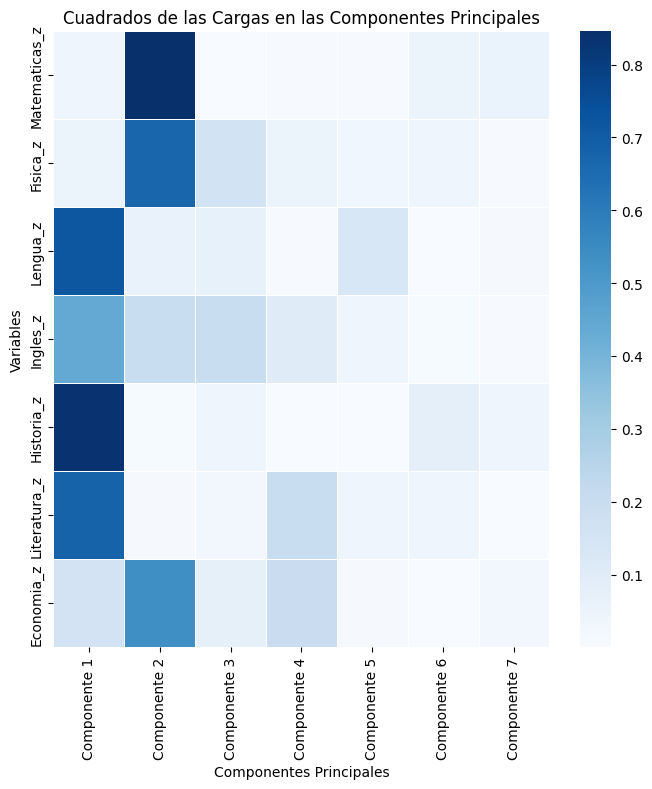

In [50]:
plot_cos2_heatmap(cos2)

c:\Users\Usuario\Desktop\Ejercicios de uni\Ejercicio 7 Mineria de datos\FuncionesMineria2.py:111: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = cmap(sum_cos2[k])


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

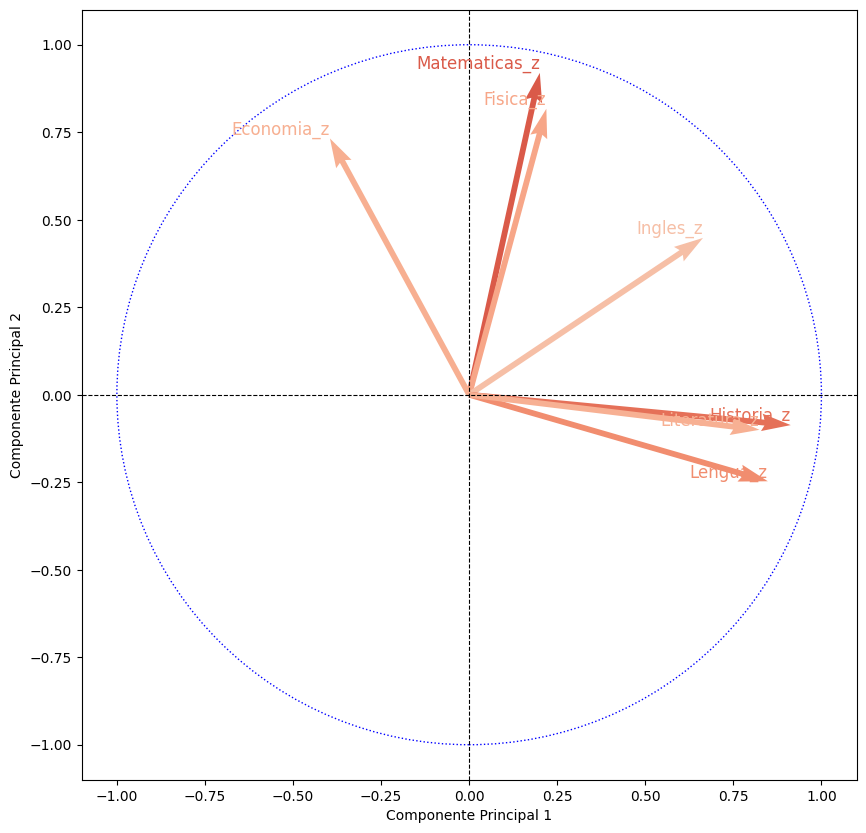

In [51]:
plot_corr_cos(fit.n_components, correlaciones_notas_con_cp)

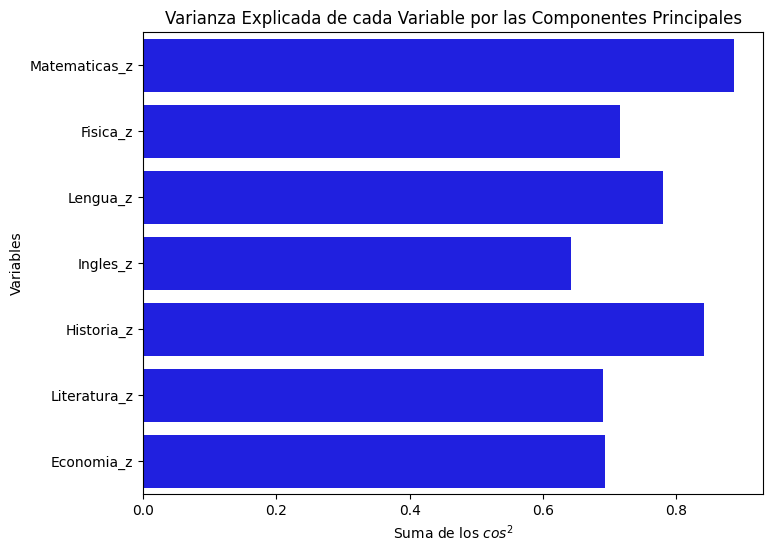

In [ ]:
plot_cos2_bars(cos2)

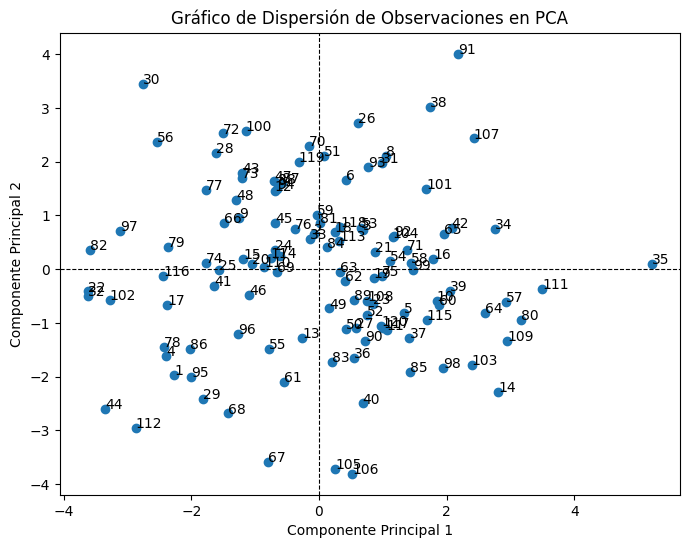

In [ ]:
plot_pca_scatter(pca, notas_std, fit.n_components)